<a href="https://colab.research.google.com/github/pacomm5/Plantillas/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
#!git clone https://github.com/joanby/machinelearning-az.git
! git clone https://github.com/pacomm5/machinelearning-az #

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10541, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 10541 (delta 25), reused 0 (delta 0), pack-reused 10505
Receiving objects: 100% (10541/10541), 311.58 MiB | 20.17 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [4]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [5]:
!pip install sklearn

# SVM

# Cómo importar las librerías


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [8]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 3 - Classification/Section 16 - Support Vector Machine (SVM)/Social_Network_Ads.csv')


In [9]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [10]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [11]:
X

array([[1.90e+01, 1.90e+04],
       [3.50e+01, 2.00e+04],
       [2.60e+01, 4.30e+04],
       [2.70e+01, 5.70e+04],
       [1.90e+01, 7.60e+04],
       [2.70e+01, 5.80e+04],
       [2.70e+01, 8.40e+04],
       [3.20e+01, 1.50e+05],
       [2.50e+01, 3.30e+04],
       [3.50e+01, 6.50e+04],
       [2.60e+01, 8.00e+04],
       [2.60e+01, 5.20e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.80e+04],
       [1.80e+01, 8.20e+04],
       [2.90e+01, 8.00e+04],
       [4.70e+01, 2.50e+04],
       [4.50e+01, 2.60e+04],
       [4.60e+01, 2.80e+04],
       [4.80e+01, 2.90e+04],
       [4.50e+01, 2.20e+04],
       [4.70e+01, 4.90e+04],
       [4.80e+01, 4.10e+04],
       [4.50e+01, 2.20e+04],
       [4.60e+01, 2.30e+04],
       [4.70e+01, 2.00e+04],
       [4.90e+01, 2.80e+04],
       [4.70e+01, 3.00e+04],
       [2.90e+01, 4.30e+04],
       [3.10e+01, 1.80e+04],
       [3.10e+01, 7.40e+04],
       [2.70e+01, 1.37e+05],
       [2.10e+01, 1.60e+04],
       [2.80e+01, 4.40e+04],
       [2.70e+

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Ajustar el SVM en el Conjunto de Entrenamiento

In [16]:
from sklearn.svm import SVC

In [17]:
classifier = SVC(kernel = "linear", random_state = 0)  # aqui estamos utilizando el lineal. 
classifier.fit(X_train, y_train) # ajustamos al x train e y train. 

SVC(kernel='linear', random_state=0)

# Predicción de los resultados con el Conjunto de Testing


In [19]:
y_pred  = classifier.predict(X_test)
y_pred # vamos a comparar el predicho con el real que es el test. y tiene bastante buena pinta. 
# perfecto nunca puede salir. sería sintomático de overfitting. 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [20]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

# Elaborar una matriz de confusión

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]])

In [23]:
(66+24)/(66+24+8+2) # 90% está bastante bien. 

0.9

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


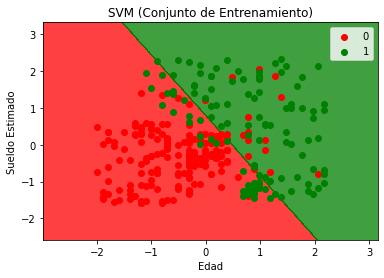

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()
# el kernel es lineal por lo tanto es una recta. 

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


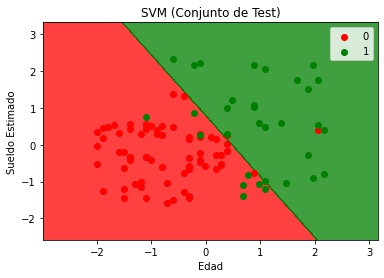

In [25]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()